# Wine Classifier with Keras



## [1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습]

### <조건>

	- 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
	- 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
	- 테스트 셋에 대한 정확도 기록




  ### <기본 설정>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [0]:
from keras import Sequential
from keras.layers import Dense, Activation

In [0]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [5]:
import numpy as np
np.__version__

'1.18.4'

In [0]:
ls '/gdrive'

'My Drive'/


### <데이터 파일 읽어오기>

In [0]:
import pandas as pd
white_wine = pd.read_csv('/gdrive/My Drive/winequality-white.csv', header = 'infer')
red_wine = pd.read_csv('/gdrive/My Drive/winequality-red.csv', header = 'infer')

In [0]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [0]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [0]:
len(white_wine)

4898

<화이트와인 : Training data, Test data 분리>

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

def generate_data(df, t_r):

  X = df.drop(['quality'], axis = 1)
  Y = df['quality']

  X_train, X_test = train_test_split(X, test_size = 1-t_r, random_state = 0)
  Y_train, Y_test = train_test_split(Y, test_size = 1-t_r, random_state = 0)


  return X_train.values, Y_train, X_test.values, Y_test

In [0]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)

In [0]:
x_train[0]

array([  6.4   ,   0.29  ,   0.44  ,   3.6   ,   0.197 ,  75.    ,
       183.    ,   0.9942,   3.01  ,   0.38  ,   9.1   ])

In [0]:
x_test[0]

array([7.3000e+00, 3.2000e-01, 3.5000e-01, 1.4000e+00, 5.0000e-02,
       8.0000e+00, 1.6300e+02, 9.9244e-01, 3.2400e+00, 4.2000e-01,
       1.0700e+01])

In [0]:
y_train

196     5
4552    6
133     5
2517    6
3034    6
       ..
4859    6
3264    6
1653    6
2607    6
2732    5
Name: quality, Length: 3428, dtype: int64

In [0]:
y_test

2762    5
42      6
1419    7
3664    8
2125    5
       ..
934     5
2803    8
3364    6
3870    6
3677    6
Name: quality, Length: 1470, dtype: int64

In [0]:
import numpy as np

print("train_data : " , x_train.shape)
print("train_label : ", y_train.size)
print("test_data : ", x_test.shape)
print("test_label : ", y_test.size)

train_data :  (3428, 11)
train_label :  3428
test_data :  (1470, 11)
test_label :  1470


In [0]:
x_train

array([[ 6.4 ,  0.29,  0.44, ...,  3.01,  0.38,  9.1 ],
       [ 6.4 ,  0.55,  0.26, ...,  3.22,  0.73, 13.1 ],
       [ 6.6 ,  0.24,  0.27, ...,  3.24,  0.51,  9.2 ],
       ...,
       [ 7.9 ,  0.33,  0.28, ...,  3.15,  0.38,  8.8 ],
       [ 8.9 ,  0.26,  0.33, ...,  3.13,  0.46, 10.8 ],
       [ 7.9 ,  0.51,  0.34, ...,  3.09,  0.51, 10.  ]])

In [0]:
y_train

196     5
4552    6
133     5
2517    6
3034    6
       ..
4859    6
3264    6
1653    6
2607    6
2732    5
Name: quality, Length: 3428, dtype: int64

In [0]:
x_test

array([[ 7.3 ,  0.32,  0.35, ...,  3.24,  0.42, 10.7 ],
       [ 7.  ,  0.31,  0.26, ...,  3.13,  0.46,  9.8 ],
       [ 7.6 ,  0.14,  0.74, ...,  3.07,  0.4 , 10.8 ],
       ...,
       [ 6.  ,  0.2 ,  0.26, ...,  3.14,  0.38, 11.5 ],
       [ 6.1 ,  0.23,  0.27, ...,  3.16,  0.4 , 10.2 ],
       [ 6.9 ,  0.58,  0.58, ...,  3.28,  0.44, 12.2 ]])

In [0]:
y_test

2762    5
42      6
1419    7
3664    8
2125    5
       ..
934     5
2803    8
3364    6
3870    6
3677    6
Name: quality, Length: 1470, dtype: int64

<화이트와인 분류 모델 훈련>


In [0]:
model = Sequential()

model.add(Dense(32, input_dim = 11, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size = 512)

Epoch 1/100
3428/3428 [==============================] - 0s 26us/step - loss: 32.7322 - accuracy: 0.1657
Epoch 2/100
3428/3428 [==============================] - 0s 5us/step - loss: 24.9843 - accuracy: 0.1234
Epoch 3/100
3428/3428 [==============================] - 0s 5us/step - loss: 18.8677 - accuracy: 0.1972
Epoch 4/100
3428/3428 [==============================] - 0s 5us/step - loss: 16.7184 - accuracy: 0.4440
Epoch 5/100
3428/3428 [==============================] - 0s 6us/step - loss: 14.6257 - accuracy: 0.4454
Epoch 6/100
3428/3428 [==============================] - 0s 6us/step - loss: 12.1436 - accuracy: 0.3305
Epoch 7/100
3428/3428 [==============================] - 0s 4us/step - loss: 10.0578 - accuracy: 0.2862
Epoch 8/100
3428/3428 [==============================] - 0s 4us/step - loss: 7.8296 - accuracy: 0.3789
Epoch 9/100
3428/3428 [==============================] - 0s 5us/step - loss: 5.6881 - accuracy: 0.3932
Epoch 10/100
3428/3428 [==============================] - 0s 4us/

In [0]:
history.history

{'accuracy': [0.16569428,
  0.12339557,
  0.19719954,
  0.44399068,
  0.44544923,
  0.33051342,
  0.2861727,
  0.37893817,
  0.3932322,
  0.33051342,
  0.2750875,
  0.31826138,
  0.34014,
  0.289965,
  0.2998833,
  0.32672113,
  0.32292882,
  0.31271878,
  0.3205951,
  0.3205951,
  0.31388566,
  0.32934657,
  0.31621936,
  0.32555425,
  0.3188448,
  0.32555425,
  0.33343056,
  0.31942824,
  0.34072345,
  0.32759628,
  0.3585181,
  0.37835473,
  0.3856476,
  0.40956825,
  0.41365227,
  0.42882147,
  0.43611434,
  0.44515753,
  0.4524504,
  0.4489498,
  0.45332554,
  0.4504084,
  0.455951,
  0.45478413,
  0.45886815,
  0.45682615,
  0.46032673,
  0.455951,
  0.4577013,
  0.45915985,
  0.45682615,
  0.455951,
  0.46207702,
  0.46120188,
  0.46149358,
  0.45390898,
  0.4562427,
  0.4617853,
  0.4577013,
  0.46120188,
  0.4582847,
  0.45740956,
  0.45682615,
  0.46120188,
  0.45857644,
  0.45536757,
  0.46295217,
  0.45915985,
  0.47228706,
  0.46645275,
  0.4597433,
  0.46353558,
  0.46528

### <화이트와인 epoch에 따른 loss 변화>

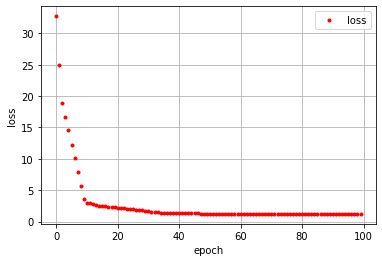

In [0]:
import numpy
import matplotlib.pyplot as plt

y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, 'o', c='red', markersize=3, label = 'loss')


plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [0]:
len(y_acc)

100

<화이트와인 epoch에 따른 accuracy 변화>

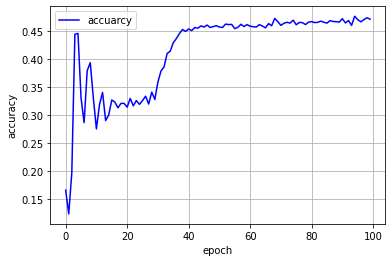

In [0]:
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

### <화이트와인 분류 모델의 accuracy>


In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.4346938729286194


### <레드와인 : Training data, Test data 분리>

In [0]:
w_train, z_train, w_test, z_test = generate_data(red_wine, 0.7)

In [0]:
w_train


array([[ 8.6 ,  0.49,  0.29, ...,  2.93,  1.98,  9.8 ],
       [ 8.  ,  0.18,  0.37, ...,  2.89,  0.44, 12.7 ],
       [ 6.8 ,  0.67,  0.  , ...,  3.4 ,  0.74,  9.7 ],
       ...,
       [ 7.9 ,  0.57,  0.31, ...,  3.29,  0.69,  9.5 ],
       [13.  ,  0.47,  0.49, ...,  3.3 ,  0.68, 12.7 ],
       [ 9.8 ,  0.98,  0.32, ...,  3.25,  0.48,  9.4 ]])

In [0]:
z_train

92      5
1017    6
1447    5
838     7
40      5
       ..
763     5
835     5
1216    6
559     6
684     5
Name: quality, Length: 1119, dtype: int64

In [0]:
w_test

array([[10.8 ,  0.47,  0.43, ...,  3.17,  0.76, 10.8 ],
       [ 8.1 ,  0.82,  0.  , ...,  3.36,  0.53,  9.6 ],
       [ 9.1 ,  0.29,  0.33, ...,  3.26,  0.84, 11.7 ],
       ...,
       [ 7.8 ,  0.55,  0.35, ...,  3.25,  0.56,  9.2 ],
       [ 6.8 ,  0.65,  0.02, ...,  3.35,  0.62, 10.4 ],
       [ 8.  ,  0.43,  0.36, ...,  3.34,  0.46,  9.4 ]])

In [0]:
z_test

1109    6
1032    5
1002    7
487     6
979     5
       ..
801     5
61      5
431     5
1210    6
713     5
Name: quality, Length: 480, dtype: int64

### <red_wine 모델 훈련>

In [0]:
model = Sequential()
model.add(Dense(32, input_dim = 11, activation = 'relu' ))
model.add(Dense(11, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history2 = model.fit(w_train, z_train, epochs=100, batch_size = 512)

Epoch 1/100
1119/1119 [==============================] - 0s 50us/step - loss: 17.7171 - accuracy: 0.0116
Epoch 2/100
1119/1119 [==============================] - 0s 7us/step - loss: 15.3805 - accuracy: 0.0116
Epoch 3/100
1119/1119 [==============================] - 0s 8us/step - loss: 13.1035 - accuracy: 0.0116
Epoch 4/100
1119/1119 [==============================] - 0s 8us/step - loss: 10.8633 - accuracy: 0.0179
Epoch 5/100
1119/1119 [==============================] - 0s 8us/step - loss: 8.9774 - accuracy: 0.0599
Epoch 6/100
1119/1119 [==============================] - 0s 9us/step - loss: 7.8509 - accuracy: 0.1376
Epoch 7/100
1119/1119 [==============================] - 0s 9us/step - loss: 7.0054 - accuracy: 0.2118
Epoch 8/100
1119/1119 [==============================] - 0s 8us/step - loss: 6.1694 - accuracy: 0.2475
Epoch 9/100
1119/1119 [==============================] - 0s 8us/step - loss: 5.3920 - accuracy: 0.2708
Epoch 10/100
1119/1119 [==============================] - 0s 9us/ste

In [0]:
history2.history

{'accuracy': [0.011617515,
  0.011617515,
  0.011617515,
  0.017873101,
  0.05987489,
  0.13762288,
  0.21179625,
  0.24754246,
  0.2707775,
  0.2841823,
  0.30384272,
  0.31903484,
  0.31903484,
  0.31903484,
  0.37712243,
  0.4110813,
  0.41018766,
  0.4030384,
  0.36282396,
  0.3360143,
  0.33333334,
  0.3360143,
  0.37444147,
  0.39320824,
  0.4110813,
  0.41197497,
  0.43789098,
  0.44414657,
  0.42984807,
  0.43163538,
  0.42984807,
  0.44682753,
  0.43878463,
  0.43610367,
  0.43252903,
  0.42091152,
  0.42627347,
  0.42895442,
  0.42627347,
  0.42806077,
  0.43699732,
  0.43074173,
  0.43431637,
  0.43252903,
  0.42806077,
  0.43252903,
  0.42806077,
  0.42269883,
  0.4235925,
  0.42001787,
  0.41644326,
  0.42627347,
  0.42984807,
  0.43342268,
  0.42984807,
  0.4253798,
  0.4235925,
  0.42716712,
  0.42448616,
  0.4253798,
  0.42627347,
  0.43610367,
  0.44235924,
  0.44414657,
  0.43699732,
  0.42269883,
  0.43163538,
  0.43431637,
  0.42716712,
  0.42806077,
  0.44235924,
 

<red_wine loss 시각화>

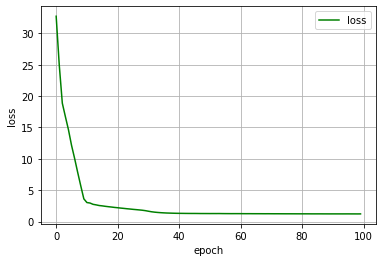

In [0]:
z_loss = history.history['loss']
z_acc = history.history['accuracy']

w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_loss, '-', c='green', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### <red_wine accuracy 시각화>




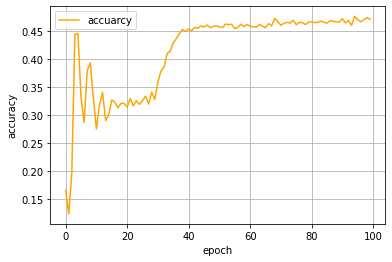

In [0]:
w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_acc, '-', c='orange', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss2, test_acc2 = model.evaluate(w_test, z_test, verbose=2)
print(test_acc2)

0.47083333134651184


# [2-1. white_wine의 hyperparameter 튜닝]


### 1) Hidden Layer의 크기와 수 증가 (Training data : Test data = 7 : 3)





In [0]:
model = Sequential()

model.add(Dense(64, input_dim = 11, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size = 512)

Epoch 1/100
3428/3428 [==============================] - 0s 30us/step - loss: 5.1492 - accuracy: 8.7515e-04
Epoch 2/100
3428/3428 [==============================] - 0s 6us/step - loss: 2.8224 - accuracy: 0.0032
Epoch 3/100
3428/3428 [==============================] - 0s 6us/step - loss: 2.1059 - accuracy: 0.0435
Epoch 4/100
3428/3428 [==============================] - 0s 5us/step - loss: 1.9271 - accuracy: 0.2938
Epoch 5/100
3428/3428 [==============================] - 0s 5us/step - loss: 1.8236 - accuracy: 0.4320
Epoch 6/100
3428/3428 [==============================] - 0s 5us/step - loss: 1.7718 - accuracy: 0.4545
Epoch 7/100
3428/3428 [==============================] - 0s 5us/step - loss: 1.7294 - accuracy: 0.4562
Epoch 8/100
3428/3428 [==============================] - 0s 5us/step - loss: 1.6858 - accuracy: 0.4574
Epoch 9/100
3428/3428 [==============================] - 0s 5us/step - loss: 1.6443 - accuracy: 0.4554
Epoch 10/100
3428/3428 [==============================] - 0s 5us/ste

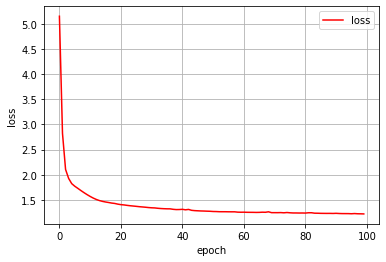

In [0]:

y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')


plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

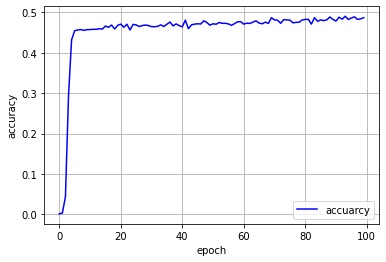

In [0]:

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.44489794969558716


### 2) 1)과 같은 조건에서 Learning_rate 를 추가로 변경


In [0]:
model = Sequential()

model.add(Dense(64, input_dim = 11, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size = 512)

Epoch 1/100
3428/3428 [==============================] - 0s 30us/step - loss: 12.1553 - accuracy: 0.2077
Epoch 2/100
3428/3428 [==============================] - 0s 5us/step - loss: 6.4754 - accuracy: 0.4516
Epoch 3/100
3428/3428 [==============================] - 0s 5us/step - loss: 2.4654 - accuracy: 0.4338
Epoch 4/100
3428/3428 [==============================] - 0s 5us/step - loss: 1.9972 - accuracy: 0.2996
Epoch 5/100
3428/3428 [==============================] - 0s 5us/step - loss: 1.6424 - accuracy: 0.3381
Epoch 6/100
3428/3428 [==============================] - 0s 6us/step - loss: 1.4741 - accuracy: 0.4586
Epoch 7/100
3428/3428 [==============================] - 0s 5us/step - loss: 1.3800 - accuracy: 0.4609
Epoch 8/100
3428/3428 [==============================] - 0s 5us/step - loss: 1.3488 - accuracy: 0.3897
Epoch 9/100
3428/3428 [==============================] - 0s 6us/step - loss: 1.3113 - accuracy: 0.4560
Epoch 10/100
3428/3428 [==============================] - 0s 5us/step -

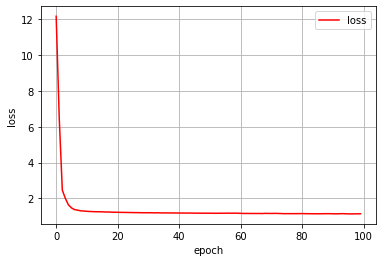

In [0]:

y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')


plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

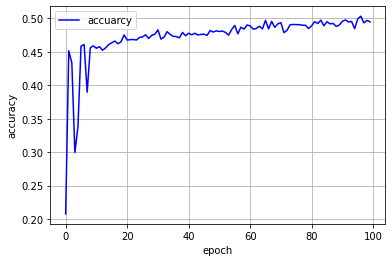

In [0]:

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.4503401219844818


### 3) 2)와 같은 조건에서 Hidden Layer의 크기와 수 증가


In [0]:
model = Sequential()

model.add(Dense(256, input_dim = 11, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size = 512)

Epoch 1/100
3428/3428 [==============================] - 0s 53us/step - loss: 2.1813 - accuracy: 0.4087
Epoch 2/100
3428/3428 [==============================] - 0s 14us/step - loss: 1.5841 - accuracy: 0.3261
Epoch 3/100
3428/3428 [==============================] - 0s 13us/step - loss: 1.3991 - accuracy: 0.4536
Epoch 4/100
3428/3428 [==============================] - 0s 13us/step - loss: 1.3396 - accuracy: 0.4487
Epoch 5/100
3428/3428 [==============================] - 0s 14us/step - loss: 1.3141 - accuracy: 0.4557
Epoch 6/100
3428/3428 [==============================] - 0s 15us/step - loss: 1.2989 - accuracy: 0.4606
Epoch 7/100
3428/3428 [==============================] - 0s 15us/step - loss: 1.2926 - accuracy: 0.4487
Epoch 8/100
3428/3428 [==============================] - 0s 14us/step - loss: 1.2728 - accuracy: 0.4647
Epoch 9/100
3428/3428 [==============================] - 0s 15us/step - loss: 1.2602 - accuracy: 0.4700
Epoch 10/100
3428/3428 [==============================] - 0s 15u

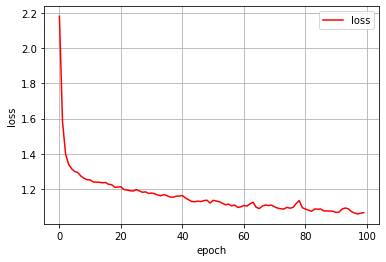

In [0]:

y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')


plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

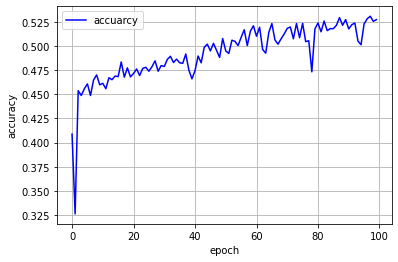

In [0]:

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.4972788989543915


## 5) 기본 조건에서 batch_size 조정




In [0]:
model = Sequential()

model.add(Dense(32, input_dim = 11, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping()
#history = model.fit(x_train, y_train, epochs=1000, batch_size = 128, callbacks=[early_stopping])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size = 256)

Train on 3428 samples, validate on 1470 samples
Epoch 1/100
3428/3428 [==============================] - 0s 27us/step - loss: 15.5300 - accuracy: 0.4201 - val_loss: 12.6788 - val_accuracy: 0.4014
Epoch 2/100
3428/3428 [==============================] - 0s 8us/step - loss: 10.4202 - accuracy: 0.4174 - val_loss: 7.7469 - val_accuracy: 0.4197
Epoch 3/100
3428/3428 [==============================] - 0s 8us/step - loss: 5.5666 - accuracy: 0.4364 - val_loss: 3.3873 - val_accuracy: 0.4075
Epoch 4/100
3428/3428 [==============================] - 0s 9us/step - loss: 3.0393 - accuracy: 0.3836 - val_loss: 2.4978 - val_accuracy: 0.3898
Epoch 5/100
3428/3428 [==============================] - 0s 9us/step - loss: 2.2521 - accuracy: 0.4058 - val_loss: 2.1006 - val_accuracy: 0.3932
Epoch 6/100
3428/3428 [==============================] - 0s 10us/step - loss: 2.0006 - accuracy: 0.4236 - val_loss: 1.9560 - val_accuracy: 0.3810
Epoch 7/100
3428/3428 [==============================] - 0s 9us/step - loss: 

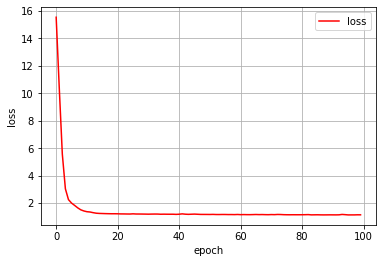

In [0]:
y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

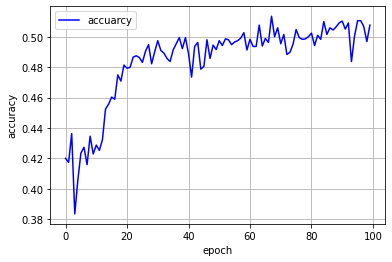

In [0]:

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.4891156554222107


## <Dropout>

In [0]:
from keras.layers import Dropout

### 6) 5)와 같은 조건에서 batch_size 128로 변경


In [0]:
model = Sequential()

model.add(Dense(32, input_dim = 11, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping()
#history = model.fit(x_train, y_train, epochs=1000, batch_size = 128, callbacks=[early_stopping])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size = 128)

Train on 3428 samples, validate on 1470 samples
Epoch 1/100
3428/3428 [==============================] - 0s 32us/step - loss: 22.2677 - accuracy: 0.0674 - val_loss: 7.3026 - val_accuracy: 0.0714
Epoch 2/100
3428/3428 [==============================] - 0s 13us/step - loss: 3.7825 - accuracy: 0.3156 - val_loss: 2.6853 - val_accuracy: 0.3592
Epoch 3/100
3428/3428 [==============================] - 0s 13us/step - loss: 2.1375 - accuracy: 0.3541 - val_loss: 1.8199 - val_accuracy: 0.3422
Epoch 4/100
3428/3428 [==============================] - 0s 13us/step - loss: 1.6564 - accuracy: 0.3591 - val_loss: 1.6246 - val_accuracy: 0.3503
Epoch 5/100
3428/3428 [==============================] - 0s 15us/step - loss: 1.5150 - accuracy: 0.3734 - val_loss: 1.5363 - val_accuracy: 0.2803
Epoch 6/100
3428/3428 [==============================] - 0s 13us/step - loss: 1.4491 - accuracy: 0.3763 - val_loss: 1.4671 - val_accuracy: 0.3578
Epoch 7/100
3428/3428 [==============================] - 0s 14us/step - los

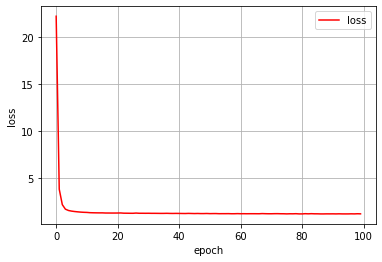

In [0]:
y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

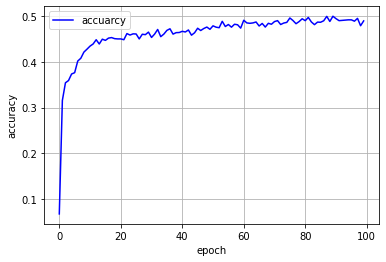

In [0]:

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.43809524178504944


### 7) 6)과 같은 조건에서 Hidden Layer = 6으로 증가

In [0]:
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping()
#history = model.fit(x_train, y_train, epochs=1000, batch_size = 128, callbacks=[early_stopping])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size = 128)

Train on 3428 samples, validate on 1470 samples
Epoch 1/100
3428/3428 [==============================] - 0s 123us/step - loss: 1.9019 - accuracy: 0.2678 - val_loss: 1.6624 - val_accuracy: 0.3116
Epoch 2/100
3428/3428 [==============================] - 0s 70us/step - loss: 1.5264 - accuracy: 0.3235 - val_loss: 1.4278 - val_accuracy: 0.4238
Epoch 3/100
3428/3428 [==============================] - 0s 68us/step - loss: 1.3354 - accuracy: 0.4519 - val_loss: 1.3466 - val_accuracy: 0.4231
Epoch 4/100
3428/3428 [==============================] - 0s 68us/step - loss: 1.2957 - accuracy: 0.4542 - val_loss: 1.3429 - val_accuracy: 0.4054
Epoch 5/100
3428/3428 [==============================] - 0s 69us/step - loss: 1.2706 - accuracy: 0.4507 - val_loss: 1.3018 - val_accuracy: 0.4252
Epoch 6/100
3428/3428 [==============================] - 0s 67us/step - loss: 1.2524 - accuracy: 0.4498 - val_loss: 1.3100 - val_accuracy: 0.4000
Epoch 7/100
3428/3428 [==============================] - 0s 66us/step - los

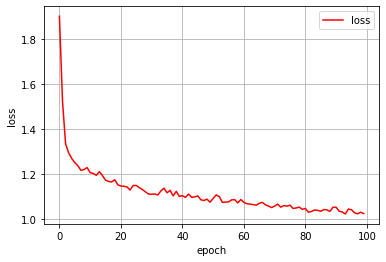

In [0]:
y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

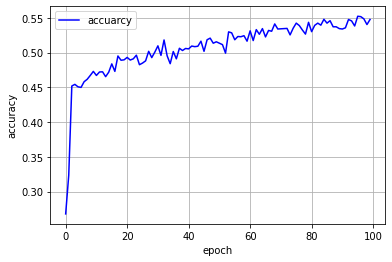

In [0]:

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.49455782771110535


### 8) 7)과 같은 조건에서 epoch수 1000으로 증가

In [9]:
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping()
#history = model.fit(x_train, y_train, epochs=1000, batch_size = 128, callbacks=[early_stopping])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=1000, batch_size = 128)

Train on 3428 samples, validate on 1470 samples
Epoch 1/1000
3428/3428 [==============================] - 1s 183us/step - loss: 2.0178 - accuracy: 0.3775 - val_loss: 1.5716 - val_accuracy: 0.4286
Epoch 2/1000
3428/3428 [==============================] - 0s 73us/step - loss: 1.4588 - accuracy: 0.4641 - val_loss: 1.4191 - val_accuracy: 0.4313
Epoch 3/1000
3428/3428 [==============================] - 0s 72us/step - loss: 1.3632 - accuracy: 0.4624 - val_loss: 1.3755 - val_accuracy: 0.4286
Epoch 4/1000
3428/3428 [==============================] - 0s 72us/step - loss: 1.3045 - accuracy: 0.4682 - val_loss: 1.3273 - val_accuracy: 0.4286
Epoch 5/1000
3428/3428 [==============================] - 0s 70us/step - loss: 1.2807 - accuracy: 0.4635 - val_loss: 1.2891 - val_accuracy: 0.4449
Epoch 6/1000
3428/3428 [==============================] - 0s 70us/step - loss: 1.2697 - accuracy: 0.4691 - val_loss: 1.2742 - val_accuracy: 0.4449
Epoch 7/1000
3428/3428 [==============================] - 0s 69us/ste

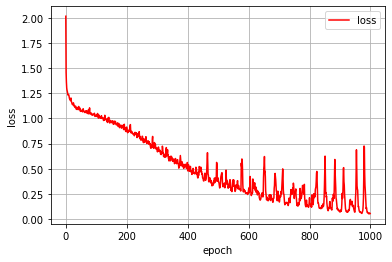

In [12]:
import numpy
import matplotlib.pyplot as plt

y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

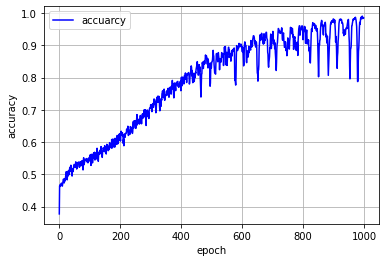

In [13]:

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.581632673740387


# [2-2. red_wine의 hyperparameter 튜닝]

### 1) Hidden Layer 1개에서 3개로, Learning rate 변경


In [0]:
model = Sequential()
model.add(Dense(64, input_dim = 11, activation = 'relu' ))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history2 = model.fit(w_train, z_train, epochs=100, batch_size = 512)

Epoch 1/100
1119/1119 [==============================] - 0s 96us/step - loss: 3.4300 - accuracy: 0.1296
Epoch 2/100
1119/1119 [==============================] - 0s 7us/step - loss: 2.7260 - accuracy: 0.2216
Epoch 3/100
1119/1119 [==============================] - 0s 8us/step - loss: 2.1959 - accuracy: 0.2404
Epoch 4/100
1119/1119 [==============================] - 0s 8us/step - loss: 1.9810 - accuracy: 0.2869
Epoch 5/100
1119/1119 [==============================] - 0s 8us/step - loss: 1.8262 - accuracy: 0.2895
Epoch 6/100
1119/1119 [==============================] - 0s 8us/step - loss: 1.7231 - accuracy: 0.3137
Epoch 7/100
1119/1119 [==============================] - 0s 7us/step - loss: 1.6626 - accuracy: 0.4138
Epoch 8/100
1119/1119 [==============================] - 0s 7us/step - loss: 1.6026 - accuracy: 0.4593
Epoch 9/100
1119/1119 [==============================] - 0s 8us/step - loss: 1.5503 - accuracy: 0.4549
Epoch 10/100
1119/1119 [==============================] - 0s 11us/step -

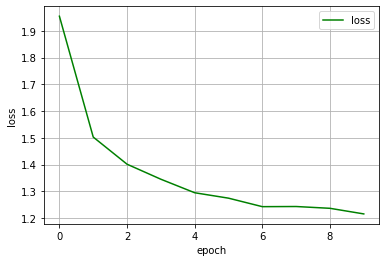

In [0]:
z_loss = history.history['loss']
z_acc = history.history['accuracy']

w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_loss, '-', c='green', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

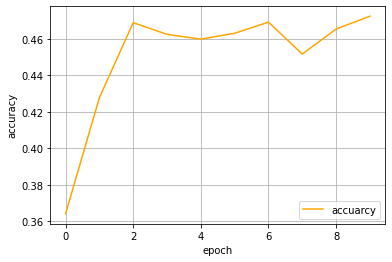

In [0]:
w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_acc, '-', c='orange', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(w_test, z_test, verbose=2)
print(test_acc)

0.5416666865348816


### 2) 1)에서 Hidden Layer를 1개에서 6개로 증가


In [0]:

model = Sequential()
model.add(Dense(512, input_dim = 11, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu' ))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history2 = model.fit(w_train, z_train, epochs=100, batch_size = 512)

Epoch 1/100
1119/1119 [==============================] - 0s 179us/step - loss: 2.7123 - accuracy: 0.2154
Epoch 2/100
1119/1119 [==============================] - 0s 41us/step - loss: 1.7517 - accuracy: 0.4307
Epoch 3/100
1119/1119 [==============================] - 0s 38us/step - loss: 1.5275 - accuracy: 0.4584
Epoch 4/100
1119/1119 [==============================] - 0s 37us/step - loss: 1.4879 - accuracy: 0.4558
Epoch 5/100
1119/1119 [==============================] - 0s 37us/step - loss: 1.4435 - accuracy: 0.4718
Epoch 6/100
1119/1119 [==============================] - 0s 37us/step - loss: 1.4135 - accuracy: 0.4933
Epoch 7/100
1119/1119 [==============================] - 0s 40us/step - loss: 1.3942 - accuracy: 0.4879
Epoch 8/100
1119/1119 [==============================] - 0s 39us/step - loss: 1.3652 - accuracy: 0.4951
Epoch 9/100
1119/1119 [==============================] - 0s 38us/step - loss: 1.3486 - accuracy: 0.4960
Epoch 10/100
1119/1119 [==============================] - 0s 39

In [0]:
z_loss = history.history['loss']
z_acc = history.history['accuracy']

w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_loss, '-', c='green', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

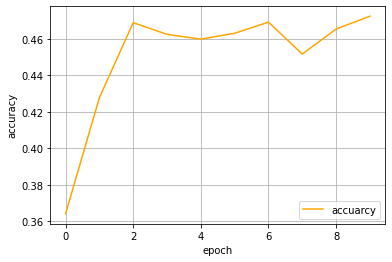

In [0]:
w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_acc, '-', c='orange', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(w_test, z_test, verbose=2)
print(test_acc)

0.6104166507720947


### 3) 2)에서 batch_size 512에서 128변




In [0]:

model = Sequential()
model.add(Dense(512, input_dim = 11, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu' ))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history2 = model.fit(w_train, z_train, epochs=100, batch_size = 128)

Epoch 1/100
1119/1119 [==============================] - 0s 187us/step - loss: 1.7896 - accuracy: 0.4325
Epoch 2/100
1119/1119 [==============================] - 0s 65us/step - loss: 1.4883 - accuracy: 0.4924
Epoch 3/100
1119/1119 [==============================] - 0s 64us/step - loss: 1.3892 - accuracy: 0.4870
Epoch 4/100
1119/1119 [==============================] - 0s 63us/step - loss: 1.3044 - accuracy: 0.4960
Epoch 5/100
1119/1119 [==============================] - 0s 63us/step - loss: 1.2723 - accuracy: 0.4781
Epoch 6/100
1119/1119 [==============================] - 0s 67us/step - loss: 1.2209 - accuracy: 0.4710
Epoch 7/100
1119/1119 [==============================] - 0s 64us/step - loss: 1.2090 - accuracy: 0.4781
Epoch 8/100
1119/1119 [==============================] - 0s 64us/step - loss: 1.1951 - accuracy: 0.4906
Epoch 9/100
1119/1119 [==============================] - 0s 72us/step - loss: 1.1796 - accuracy: 0.4924
Epoch 10/100
1119/1119 [==============================] - 0s 64

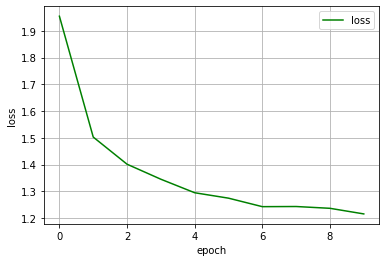

In [0]:
z_loss = history.history['loss']
z_acc = history.history['accuracy']

w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_loss, '-', c='green', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

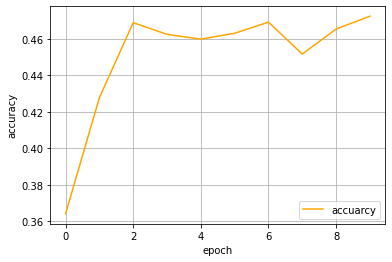

In [0]:
w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_acc, '-', c='orange', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(w_test, z_test, verbose=2)
print(test_acc)

0.5729166865348816


### 4) 3)에서 epoch 를 100에서 1000으로 변경

In [0]:

model = Sequential()
model.add(Dense(512, input_dim = 11, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu' ))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(11, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history2 = model.fit(w_train, z_train, epochs=1000, batch_size = 128)

Epoch 1/1000
1119/1119 [==============================] - 0s 216us/step - loss: 2.1209 - accuracy: 0.2332
Epoch 2/1000
1119/1119 [==============================] - 0s 65us/step - loss: 1.4473 - accuracy: 0.4298
Epoch 3/1000
1119/1119 [==============================] - 0s 66us/step - loss: 1.2585 - accuracy: 0.4388
Epoch 4/1000
1119/1119 [==============================] - 0s 66us/step - loss: 1.2106 - accuracy: 0.4763
Epoch 5/1000
1119/1119 [==============================] - 0s 69us/step - loss: 1.1964 - accuracy: 0.4960
Epoch 6/1000
1119/1119 [==============================] - 0s 66us/step - loss: 1.2033 - accuracy: 0.4665
Epoch 7/1000
1119/1119 [==============================] - 0s 66us/step - loss: 1.1829 - accuracy: 0.4799
Epoch 8/1000
1119/1119 [==============================] - 0s 76us/step - loss: 1.1643 - accuracy: 0.5147
Epoch 9/1000
1119/1119 [==============================] - 0s 65us/step - loss: 1.1751 - accuracy: 0.4897
Epoch 10/1000
1119/1119 [=============================

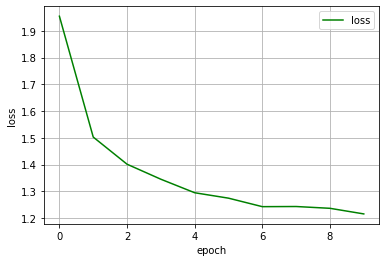

In [0]:
z_loss = history.history['loss']
z_acc = history.history['accuracy']

w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_loss, '-', c='green', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

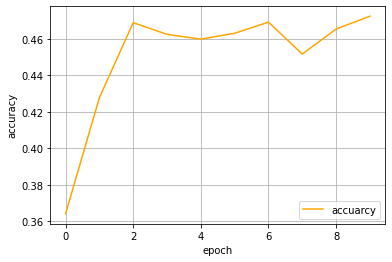

In [0]:
w_len = numpy.arange(len(z_acc))

plt.plot(w_len, z_acc, '-', c='orange', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(w_test, z_test, verbose=2)
print(test_acc)

0.606249988079071


# <2-5. white_wine의 Dropout>


In [0]:
from keras.layers import Dropout
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add((Dropout(0.2)))
model.add(Dense(128, activation = 'relu'))
model.add((Dropout(0.2)))
model.add(Dense(64, activation = 'relu'))
model.add((Dropout(0.2)))
model.add(Dense(32, activation = 'relu'))
model.add((Dropout(0.2)))
model.add(Dense(16, activation = 'relu'))
model.add((Dropout(0.2)))
model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping()
#history = model.fit(x_train, y_train, epochs=1000, batch_size = 128, callbacks=[early_stopping])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=200, batch_size = 128)

Train on 3428 samples, validate on 1470 samples
Epoch 1/200
3428/3428 [==============================] - 1s 176us/step - loss: 2.6998 - accuracy: 0.2456 - val_loss: 1.8233 - val_accuracy: 0.3184
Epoch 2/200
3428/3428 [==============================] - 0s 82us/step - loss: 1.8578 - accuracy: 0.3591 - val_loss: 1.5341 - val_accuracy: 0.4286
Epoch 3/200
3428/3428 [==============================] - 0s 82us/step - loss: 1.6962 - accuracy: 0.3731 - val_loss: 1.4614 - val_accuracy: 0.4286
Epoch 4/200
3428/3428 [==============================] - 0s 91us/step - loss: 1.6134 - accuracy: 0.3786 - val_loss: 1.4265 - val_accuracy: 0.4286
Epoch 5/200
3428/3428 [==============================] - 0s 86us/step - loss: 1.5517 - accuracy: 0.3959 - val_loss: 1.4139 - val_accuracy: 0.4286
Epoch 6/200
3428/3428 [==============================] - 0s 80us/step - loss: 1.5243 - accuracy: 0.3929 - val_loss: 1.4353 - val_accuracy: 0.4272
Epoch 7/200
3428/3428 [==============================] - 0s 77us/step - los

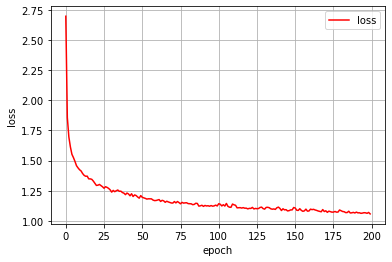

In [0]:
y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

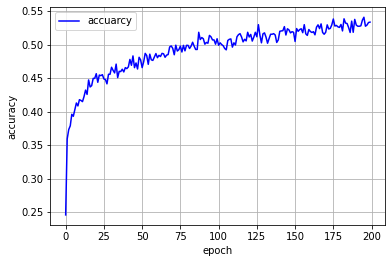

In [0]:
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.5102040767669678


## <2-6. white_wine의 Batch Normalization>

In [0]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dense(32, activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dense(16, activation = 'relu'))

model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping()
#history = model.fit(x_train, y_train, epochs=1000, batch_size = 128, callbacks=[early_stopping])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=200, batch_size = 128)

Train on 3428 samples, validate on 1470 samples
Epoch 1/200
3428/3428 [==============================] - 0s 115us/step - loss: 2.0351 - accuracy: 0.3944 - val_loss: 1.7618 - val_accuracy: 0.4286
Epoch 2/200
3428/3428 [==============================] - 0s 72us/step - loss: 1.5474 - accuracy: 0.4484 - val_loss: 1.5115 - val_accuracy: 0.4299
Epoch 3/200
3428/3428 [==============================] - 0s 75us/step - loss: 1.4118 - accuracy: 0.4568 - val_loss: 1.4375 - val_accuracy: 0.4265
Epoch 4/200
3428/3428 [==============================] - 0s 67us/step - loss: 1.3549 - accuracy: 0.4630 - val_loss: 1.3808 - val_accuracy: 0.4449
Epoch 5/200
3428/3428 [==============================] - 0s 68us/step - loss: 1.3282 - accuracy: 0.4548 - val_loss: 1.3538 - val_accuracy: 0.4306
Epoch 6/200
3428/3428 [==============================] - 0s 65us/step - loss: 1.2951 - accuracy: 0.4530 - val_loss: 1.3087 - val_accuracy: 0.4361
Epoch 7/200
3428/3428 [==============================] - 0s 67us/step - los

KeyboardInterrupt: ignored

In [0]:
y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [0]:
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

### <2-7. white_wine의 가중치 초기화>





In [0]:
from keras.layers import Dropout
from keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(512, input_dim = 11, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(32, activation = 'relu' ,kernel_initializer = 'he_normal'))
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal'))

model.add(Dense(11, activation = 'softmax'))

#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=200, batch_size = 128)

In [0]:
y_loss = history.history['loss']
y_acc = history.history['accuracy']

x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_loss, '-', c='red', markersize=3, label = 'loss')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [0]:
x_len = numpy.arange(len(y_acc))

plt.plot(x_len, y_acc, '-', c='blue', markersize=3, label = 'accuarcy')

plt.legend(loc='best')   
plt.grid()   # 격자 
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)